In [1]:
import numpy as np
from pathlib import Path
from PIL import Image
import math

In [2]:
import plotly.express as px

In [3]:
import matplotlib.pyplot as plt

In [4]:
available_patterns = list(Path('../../22_andere_daten/patterns/').glob('./*.tif'))

In [5]:
available_patterns[5]

PosixPath('../../22_andere_daten/patterns/lines_150lpi_5.tif')

In [6]:
Image.MAX_IMAGE_PIXELS = None

In [7]:
img = Image.open(available_patterns[5])

In [8]:
np_img = np.array(img).astype('uint8')

In [9]:
ft = np.fft.ifftshift(np_img)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

In [24]:
def get_grating( angle, is_lifted=True ):
    radians = (math.pi * angle) / 180 
    
    x = np.arange(-500, 501, 1)
    X, Y = np.meshgrid(x, x)
    
    wavelength = 200
    grating = 0.5 * np.sin(
        2*np.pi*(X*np.cos(radians) + Y*np.sin(radians)) / (wavelength / 2)
    )

    if is_lifted:
        grating += 0.5

    return grating

In [12]:
def get_fourier_transform( grating ):
    # Calculate Fourier transform of grating
    ft = np.fft.ifftshift(grating)
    ft = np.fft.fft2(ft)
    ft = np.fft.fftshift(ft)

    return ft

In [13]:
def show_grating( grating ):
    plt.set_cmap("gray")
    plt.subplot(121)
    plt.imshow(grating)

    ft = get_fourier_transform( grating )
    
    plt.subplot(122)
    plt.imshow(abs(ft))
    plt.xlim([480, 520])
    plt.ylim([520, 480])  # Note, order is reversed for y
    plt.show()

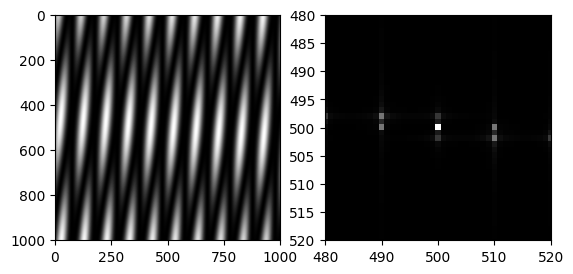

In [22]:
grating_a = get_grating(0)
grating_b = get_grating(10)

show_grating( grating_a * grating_b )

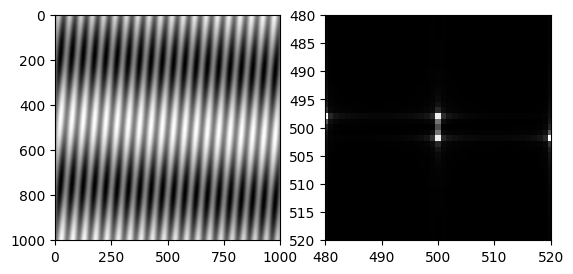

In [27]:
grating_a = get_grating(0, is_lifted=False)
grating_b = get_grating(10, is_lifted=False)

show_grating( grating_a * grating_b )

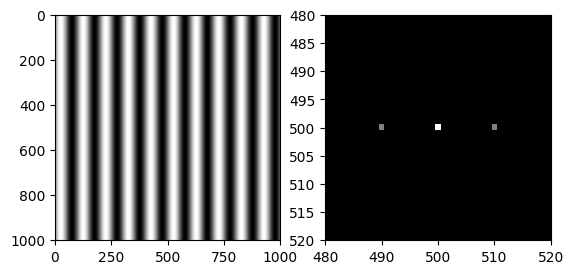

In [15]:
show_grating( grating_a )

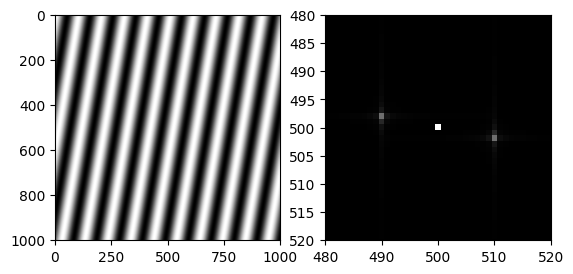

In [16]:
show_grating( grating_b )

In [ ]:
np.sort(ft.flatten())[::-1][0]

In [ ]:
coords = []
sorted = np.sort(ft.flatten())[::-1]

for i in range(9):
    c = np.where(ft == sorted[i])
    c = [(sorted[i], c[0][j], c[1][j]) for j in range(len(c[0]))]
    coords.append(c)

coords_filtered = []
for c in coords:
    if c not in coords_filtered:
        coords_filtered.append(c)

coords = []
for c in coords_filtered:
    coords += c

In [ ]:
coords

In [ ]:
distances = [math.sqrt(abs(500 - c[1]) ** 2 + abs(500 - c[2]) ** 2) for c in coords]

In [ ]:
[1/d for d in distances if d != 0]

In [ ]:
px.line([c[0] for c in coords])